In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# prefix = "data/10__0.1__0.4__5e-09__1000__"
prefix = "data/2024.09.11-14h39_"

chi2_df = pd.read_csv(prefix+"chi2.csv", header=None)
pars_df = pd.read_csv(prefix+"pars.csv", header=None, delimiter = " ")

Om = pars_df[0].values
As = pars_df[1].values
chi2 = chi2_df[0].values


# Tri
indices_tri_Om = np.argsort(Om)
indices_tri_As = np.argsort(As)

Om_tri_Om = Om[indices_tri_Om]
chi2_tri_Om = chi2[indices_tri_Om]

chi2_tri_As = chi2[indices_tri_As]
As_tri_As = As[indices_tri_As]

%matplotlib widget

### Sans tri

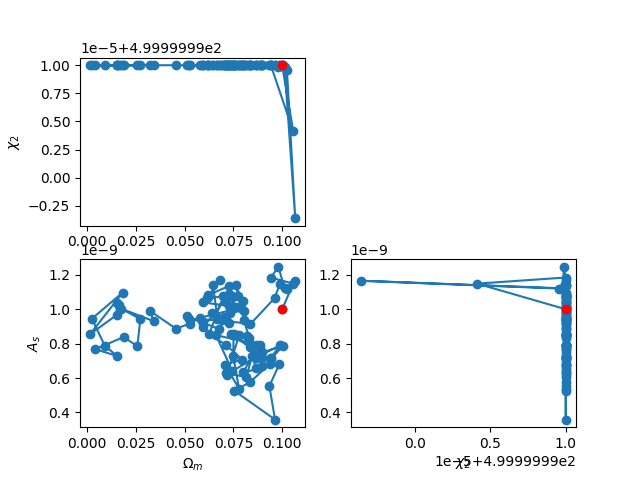

In [11]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(Om,chi2, 'o-')
plt.plot(Om[0],chi2[0], 'ro')
plt.ylabel(r"$\chi_2$")

plt.subplot(2, 2, 3)
plt.plot(Om,As, 'o-')
plt.plot(Om[0],As[0], 'ro')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$A_s$")

plt.subplot(2, 2, 4)
plt.plot(chi2,As, 'o-')
plt.plot(chi2[0],As[0], 'ro')
plt.xlabel(r"$\chi_2$")

plt.show()

### Avec tri

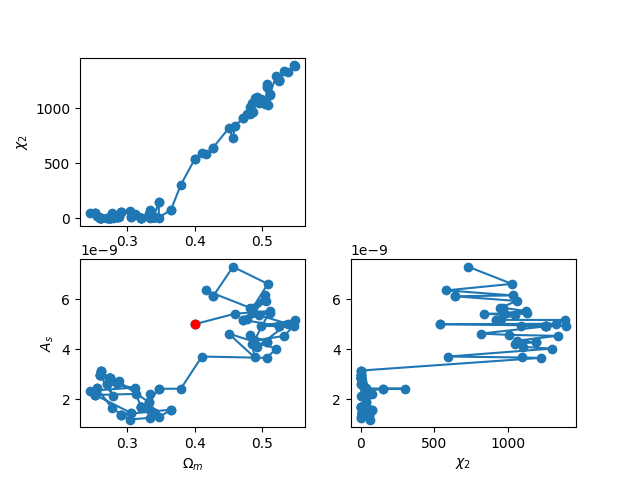

In [38]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(Om_tri_Om,chi2_tri_Om, 'o-')
plt.ylabel(r"$\chi_2$")

plt.subplot(2, 2, 3)
plt.plot(Om,As, 'o-')
plt.plot(Om[0],As[0], 'ro')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$A_s$")

plt.subplot(2, 2, 4)
plt.plot(chi2_tri_As,As_tri_As, 'o-')
plt.xlabel(r"$\chi_2$")

plt.show()